In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris = pd.read_csv('/kaggle/input/iris-data/iris.csv', index_col=0)
iris.tail()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
iris.shape

(150, 5)

In [4]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


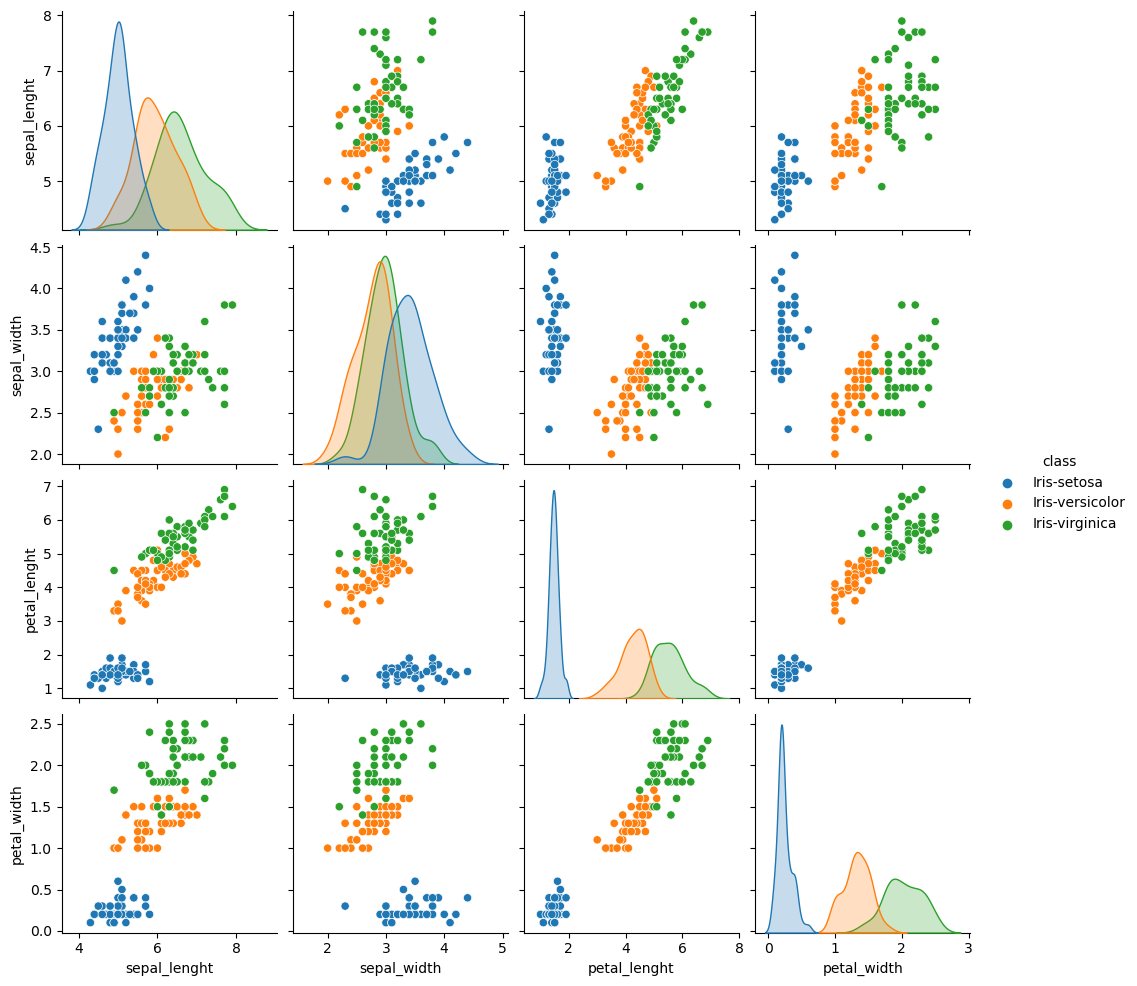

In [5]:
sns.pairplot(iris, hue='class') # 

### Seperate the features and label 

In [6]:
X = iris.drop('class', axis=1) # features
y = iris['class'] # labels

In [7]:
# from sklearn.family_name import model
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Initializing the model. Here we are
# using arbitrary value for 'K' i.e. 'n_neighbors'
model = KNeighborsClassifier(n_neighbors=7, metric='manhattan')

# training a knn model
model.fit(X,y)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)

In [9]:
# predicting a new sample value 
sample = np.array([4.5, 3.2, 1.6, 0.5])
model.predict([sample]) 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [10]:
model.score(X, y)

0.9733333333333334

In [11]:
# plot_classifier(KNeighborsClassifier(7), X, y) # lets look at our decision boundary

In [12]:
# this loop will tell us which k value is giving us best accuracy.
scores = {}
for k in range(1,40):
    knn = KNeighborsClassifier(k).fit(X, y)
    scores.update({k:knn.score(X, y)})

print(scores)

{1: 1.0, 2: 0.98, 3: 0.96, 4: 0.96, 5: 0.9666666666666667, 6: 0.9733333333333334, 7: 0.9733333333333334, 8: 0.98, 9: 0.98, 10: 0.98, 11: 0.9733333333333334, 12: 0.98, 13: 0.98, 14: 0.98, 15: 0.9866666666666667, 16: 0.9866666666666667, 17: 0.98, 18: 0.9733333333333334, 19: 0.98, 20: 0.98, 21: 0.98, 22: 0.98, 23: 0.98, 24: 0.9733333333333334, 25: 0.98, 26: 0.9733333333333334, 27: 0.9733333333333334, 28: 0.9666666666666667, 29: 0.9733333333333334, 30: 0.9533333333333334, 31: 0.96, 32: 0.9533333333333334, 33: 0.96, 34: 0.96, 35: 0.96, 36: 0.9533333333333334, 37: 0.96, 38: 0.9466666666666667, 39: 0.9533333333333334}


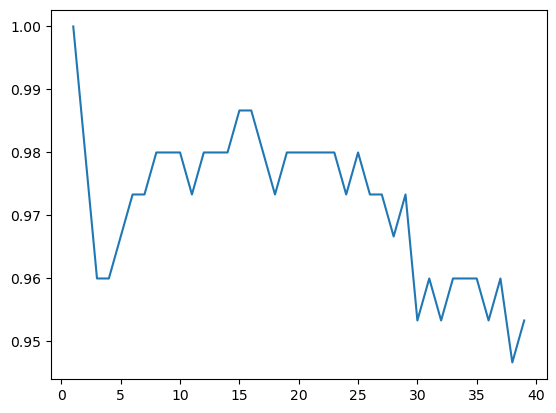

In [13]:
plt.plot(scores.keys(), scores.values());

You will notice that till a certain value of K
 accuracy reached at it’s peak and after that value accuracy starts decreasing. If you try for much larger values of K, then accuracy will becomes constant after a certain value.

In [14]:
model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')   # all features are same type unit=cm for all

model.fit(X,y)
model.score(X, y)

0.9733333333333334

In [15]:
sample = np.array([4.5, 3.2, 1.6, 0.5])
model.predict([sample]) 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)